In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pingouin import multivariate_normality
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [32]:
df = pd.read_csv(r"C:\Users\basde\Downloads\playground-series-s3e24\train.csv")

In [33]:
X = df.drop(columns=['id', 'smoking'])

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [36]:
# Perform Henze-Zirkler test for multivariate normality
hz_stat, p_val = multivariate_normality(X_scaled_df, alpha=0.05)
is_normal = p_val > 0.05

MemoryError: Unable to allocate 189. GiB for an array with shape (159256, 159256) and data type float64

In [27]:
original_eigenvalues = fa.get_eigenvalues()[0]
random_eigenvalues = fa.get_eigenvalues()[1]

In [28]:
num_optimal_components = np.sum(original_eigenvalues > random_eigenvalues)

In [29]:
print(f"Optimal number of components suggested by parallel analysis: {num_optimal_components}")

Optimal number of components suggested by parallel analysis: 10


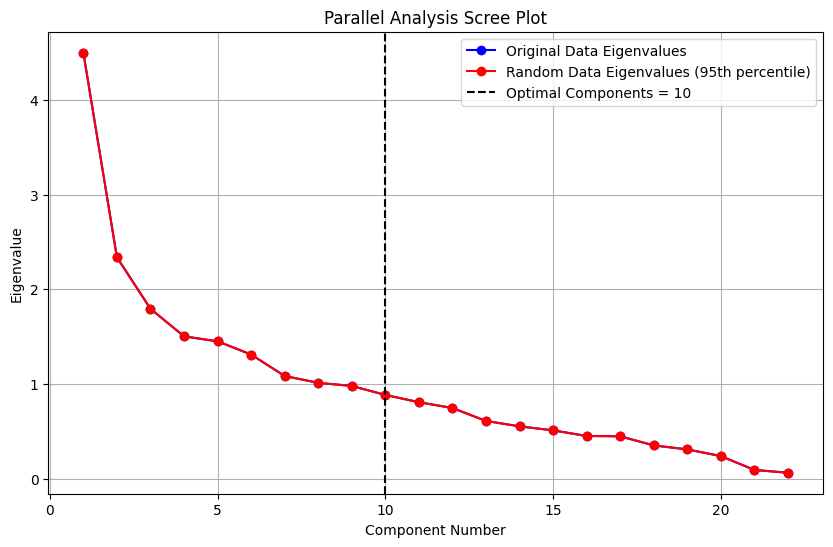

In [30]:
# 3. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, features_df.shape[1] + 1), original_eigenvalues, 'b-o', label='Original Data Eigenvalues')
plt.plot(range(1, features_df.shape[1] + 1), random_eigenvalues, 'r-o', label='Random Data Eigenvalues (95th percentile)')
plt.title('Parallel Analysis Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.axvline(x=num_optimal_components, color='k', linestyle='--', label=f'Optimal Components = {num_optimal_components}')
plt.legend()
plt.grid(True)
plt.show()